# Aproximação de $\phi$


In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# ---- carregar dados ----
Phi = pd.read_csv("../data/tabela_phi.csv", decimal=",").values

N_rot = np.arange(2e4, 6e4, 1e3)  # 40 valores
Mass = np.arange(3, 21.1, 0.1)  # 181 valores

# malha
N, M = np.meshgrid(N_rot, Mass, indexing="ij")


# ---- modelo polinomial ----
def poly(xy, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    N, M = xy
    return (
        a0
        + a1 * N
        + a2 * M
        + a3 * N**2
        + a4 * N * M
        + a5 * M**2
        + a6 * N**3
        + a7 * N**2 * M
        + a8 * N * M**2
        + a9 * M**3
    )


# ---- ajuste ----
xdata = (N.ravel(), M.ravel())
ydata = Phi.ravel()

popt, pcov = curve_fit(poly, xdata, ydata)


# ---- uso ----
def phi_func(Nv, Mv):
    return poly((Nv, Mv), *popt)


print(popt)
# print(phi_func(35000, 10.5))


[ 8.08424885e-01  1.46255600e-05  1.20236697e-02  2.91248126e-10
 -3.55829871e-06  2.88286910e-03 -5.67879568e-15  6.92841254e-11
  1.18792676e-07 -6.17384309e-04]


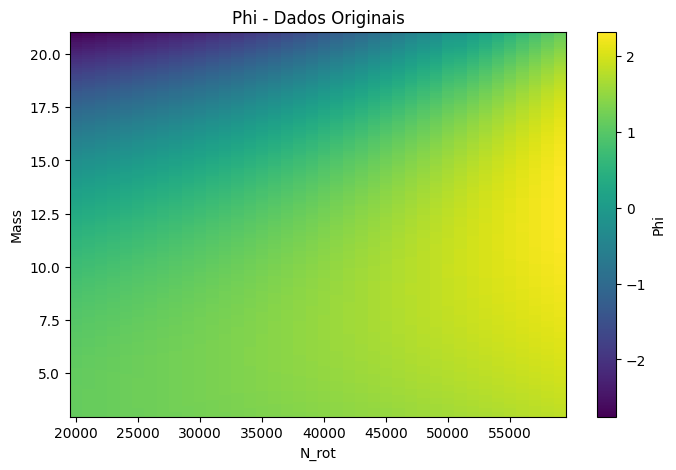

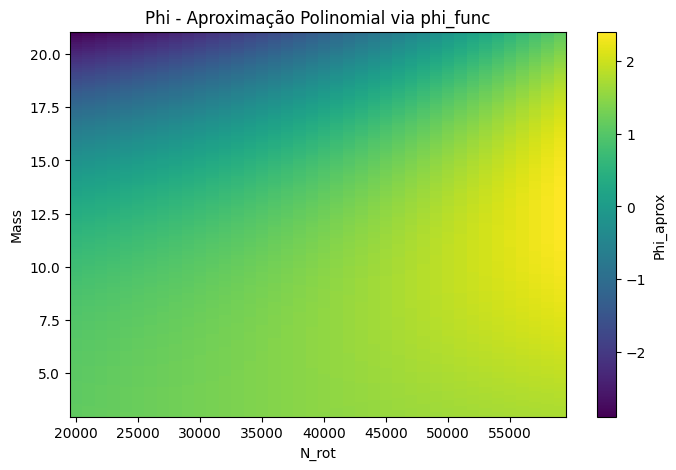

Erro percentual médio da aproximação: 15.8165%


In [2]:
import matplotlib.pyplot as plt

Phi_fit = phi_func(N, M).reshape(Phi.shape)

# ---- gráfico 1: dados reais ----
plt.figure(figsize=(8, 5))
plt.pcolormesh(N_rot, Mass, Phi.T, shading="auto")
plt.xlabel("N_rot")
plt.ylabel("Mass")
plt.title("Phi - Dados Originais")
plt.colorbar(label="Phi")
plt.show()

# ---- gráfico 2: aproximação ----
plt.figure(figsize=(8, 5))
plt.pcolormesh(N_rot, Mass, Phi_fit.T, shading="auto")
plt.xlabel("N_rot")
plt.ylabel("Mass")
plt.title("Phi - Aproximação Polinomial via phi_func")
plt.colorbar(label="Phi_aprox")
plt.show()

# erro percentual médio (%) — MAPE
erro_percentual = 100 * np.mean(np.abs(Phi - Phi_fit) / np.abs(Phi))

print(f"Erro percentual médio da aproximação: {erro_percentual:.4f}%")
